In [1]:
import pandas as pd
import glob
from collections import defaultdict
import numpy as np

import seaborn as sb
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [2]:
path='/Users/karin.hrovatin/Documents/TUM_PhD_diabetes/data/cross_system_integration/DE_pancreas_clusters/'

In [11]:
de=defaultdict(dict)
for f in glob.glob(path+'DE/*/de_results*.csv'):
    d=pd.read_table(f,sep=',',index_col=0)
    info=f.split('/')[-2]
    system=info.split('_')[0]
    comparison=''.join(info.split('_')[1:])
    print(info)
    print('up', d.query('log2FoldChange>1 & padj<0.05').shape[0],d.query('log2FoldChange>0.5 & padj<0.05').shape[0])
    print('down', d.query('log2FoldChange<-1 & padj<0.05').shape[0],d.query('log2FoldChange<-0.5 & padj<0.05').shape[0])
    de[system][comparison]={
        'up':d.query('log2FoldChange>0.5 & padj<0.05').index.to_list(),
        'down':d.query('log2FoldChange<-0.5 & padj<0.05').index.to_list()
    }

mouse_0_vs_10
up 546 885
down 621 959
mouse_0_vs_3
up 404 739
down 144 361
mouse_3_vs_10
up 31 63
down 15 96
human_0_vs_3
up 942 1347
down 964 1451
human_0_vs_10
up 892 1016
down 715 840
human_3_vs_10
up 888 1313
down 806 1240


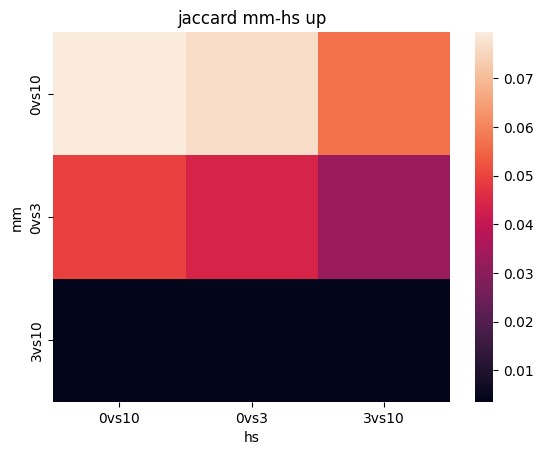

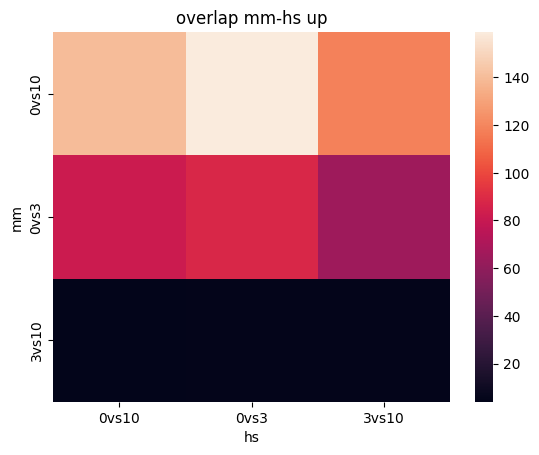

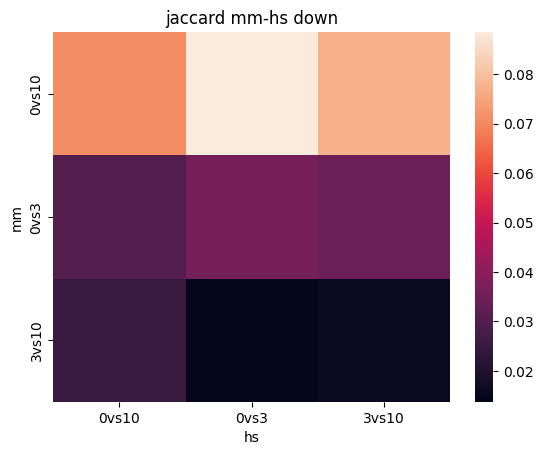

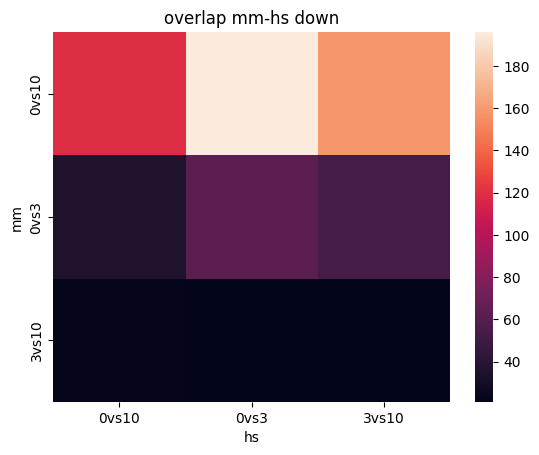

In [13]:
comparisons=['0vs10','0vs3','3vs10']
n_comp=len(comparisons)
for direction in ['up','down']:
    overlaps=np.zeros((n_comp,n_comp))
    jaccards=overlaps.copy()
    for i,c1 in enumerate(comparisons):
        for j,c2 in enumerate(comparisons):
            de1=set(de['mouse'][c1][direction])
            de2=set(de['human'][c2][direction])
            o=len(de1&de2)
            overlaps[i,j]=o
            jaccards[i,j]=o/len(de1|de2)
    overlaps=pd.DataFrame(overlaps,index=comparisons,columns=comparisons)
    jaccards=pd.DataFrame(jaccards,index=comparisons,columns=comparisons)
    for t in [overlaps,jaccards]:
        t.index.name='mm'
        t.columns.name='hs'
    for metric,data in [('jaccard',jaccards),('overlap',overlaps)]:
        sb.heatmap(data)
        plt.title(f'{metric} mm-hs {direction}')
        plt.show()
        plt.close()

## List gsea

In [20]:
for f in sorted(glob.glob(path+'gsea/*/*/*txt')):
    d=pd.read_table(f,sep='\t',index_col=0)
    info=f.split('/')[-3]
    direction=f.split('/')[-2]
    system=info.split('_')[0]
    comparison=''.join(info.split('_')[1:])
    print(system,comparison,direction)
    display(d.query('`Adjusted P-value`<0.05')[['Term','Overlap','Adjusted P-value']])

human 0vs10 downregulated


,Term,Overlap,Adjusted P-value
Gene_set,,,
KEGG_2021_Human,Oxidative phosphorylation,48/133,8.847275e-30
KEGG_2021_Human,Thermogenesis,57/232,6.501484e-26
KEGG_2021_Human,Ribosome,46/158,2.540356e-24
KEGG_2021_Human,Parkinson disease,53/249,3.739632e-21
KEGG_2021_Human,Huntington disease,57/306,6.922659e-20
KEGG_2021_Human,Non-alcoholic fatty liver disease,40/155,3.203321e-19
KEGG_2021_Human,Prion disease,51/273,6.214534e-18
KEGG_2021_Human,Amyotrophic lateral sclerosis,59/364,1.022251e-17
KEGG_2021_Human,Diabetic cardiomyopathy,43/203,2.602416e-17


human 0vs10 upregulated


,Term,Overlap,Adjusted P-value
Gene_set,,,
KEGG_2021_Human,Epstein-Barr virus infection,31/202,0.000010
KEGG_2021_Human,Salmonella infection,34/249,0.000020
KEGG_2021_Human,Endocytosis,30/252,0.001183
KEGG_2021_Human,Protein processing in endoplasmic reticulum,23/171,0.001273
KEGG_2021_Human,Parkinson disease,29/249,0.001485
KEGG_2021_Human,FoxO signaling pathway,19/131,0.001539
KEGG_2021_Human,Proteasome,10/46,0.003186
KEGG_2021_Human,Ubiquitin mediated proteolysis,18/140,0.008796
KEGG_2021_Human,Neurotrophin signaling pathway,16/119,0.009521


human 0vs3 downregulated


,Term,Overlap,Adjusted P-value
Gene_set,,,
KEGG_2021_Human,Ribosome,53/158,1.124095e-19
KEGG_2021_Human,Oxidative phosphorylation,33/133,3.925780e-08
KEGG_2021_Human,Thermogenesis,44/232,3.395788e-07
KEGG_2021_Human,Parkinson disease,41/249,4.835676e-05
KEGG_2021_Human,Huntington disease,47/306,4.846648e-05
KEGG_2021_Human,Amyotrophic lateral sclerosis,52/364,1.017802e-04
KEGG_2021_Human,Lysosome,25/128,1.975278e-04
KEGG_2021_Human,Pathways of neurodegeneration,61/475,3.536303e-04
KEGG_2021_Human,Coronavirus disease,36/232,4.006251e-04


human 0vs3 upregulated


,Term,Overlap,Adjusted P-value
Gene_set,,,
KEGG_2021_Human,Protein export,10/23,0.000278
KEGG_2021_Human,Protein processing in endoplasmic reticulum,29/171,0.000538
KEGG_2021_Human,Salmonella infection,35/249,0.002788
KEGG_2021_Human,Circadian rhythm,9/31,0.010605
KEGG_2021_Human,Spinocerebellar ataxia,22/143,0.013502
KEGG_2021_Human,Endocytosis,32/252,0.020044
KEGG_2021_Human,Huntington disease,36/306,0.033253
KEGG_2021_Human,Ubiquitin mediated proteolysis,20/140,0.037628
KEGG_2021_Human,Pathways of neurodegeneration,50/475,0.037628


human 3vs10 downregulated


,Term,Overlap,Adjusted P-value
Gene_set,,,
KEGG_2021_Human,Oxidative phosphorylation,37/133,1.223310e-12
KEGG_2021_Human,Parkinson disease,49/249,6.202197e-11
KEGG_2021_Human,Thermogenesis,46/232,1.636771e-10
KEGG_2021_Human,Non-alcoholic fatty liver disease,36/155,2.679335e-10
KEGG_2021_Human,Lysosome,32/128,4.152703e-10
KEGG_2021_Human,Prion disease,49/273,7.072584e-10
KEGG_2021_Human,Huntington disease,52/306,1.131417e-09
KEGG_2021_Human,Amyotrophic lateral sclerosis,58/364,1.131417e-09
KEGG_2021_Human,Diabetic cardiomyopathy,40/203,1.884315e-09


human 3vs10 upregulated


,Term,Overlap,Adjusted P-value
Gene_set,,,
KEGG_2021_Human,Salmonella infection,37/249,0.000732
KEGG_2021_Human,Ubiquitin mediated proteolysis,23/140,0.005656
KEGG_2021_Human,Pathogenic Escherichia coli infection,28/197,0.008605
KEGG_2021_Human,Renal cell carcinoma,14/69,0.009179
KEGG_2021_Human,Autophagy,21/137,0.013126
KEGG_2021_Human,Terpenoid backbone biosynthesis,7/22,0.017087
KEGG_2021_Human,MAPK signaling pathway,35/294,0.018960
KEGG_2021_Human,Circadian rhythm,8/31,0.023093
KEGG_2021_Human,Spliceosome,21/150,0.023093


mouse 0vs10 downregulated


,Term,Overlap,Adjusted P-value
Gene_set,,,
KEGG_2021_Human,Citrate cycle (TCA cycle),9/30,0.002217
KEGG_2021_Human,Thermogenesis,25/232,0.016891
KEGG_2021_Human,Parkinson disease,26/249,0.016891
KEGG_2021_Human,Spliceosome,18/150,0.023271
KEGG_2021_Human,"Valine, leucine and isoleucine degradation",9/48,0.023925
KEGG_2021_Human,Insulin resistance,14/108,0.032305
KEGG_2021_Human,Sulfur metabolism,4/10,0.036753
KEGG_2021_Human,Gap junction,12/88,0.036753
KEGG_2021_Human,Tight junction,18/169,0.038871


mouse 0vs10 upregulated


,Term,Overlap,Adjusted P-value
Gene_set,,,
KEGG_2021_Human,Protein processing in endoplasmic reticulum,48/171,3.740652e-23
KEGG_2021_Human,Protein export,9/23,4.007092e-05
KEGG_2021_Human,N-Glycan biosynthesis,10/50,5.074745e-03
KEGG_2021_Human,Ribosome,19/158,5.074745e-03
KEGG_2021_Human,Coronavirus disease,23/232,1.471492e-02
KEGG_2021_Human,Autophagy,16/137,1.483846e-02
KEGG_2021_Human,Glycerophospholipid metabolism,13/98,1.483846e-02


mouse 0vs3 downregulated


,Term,Overlap,Adjusted P-value
Gene_set,,,
KEGG_2021_Human,Type II diabetes mellitus,6/46,0.024841
KEGG_2021_Human,Adipocytokine signaling pathway,7/69,0.024841
KEGG_2021_Human,"Growth hormone synthesis, secretion and action",9/119,0.024841
KEGG_2021_Human,Spliceosome,10/150,0.024841
KEGG_2021_Human,Insulin resistance,8/108,0.037513
KEGG_2021_Human,Maturity onset diabetes of the young,4/26,0.046540


mouse 0vs3 upregulated


,Term,Overlap,Adjusted P-value
Gene_set,,,
KEGG_2021_Human,Ribosome,43/158,4.032447e-23
KEGG_2021_Human,Coronavirus disease,48/232,1.367058e-20
KEGG_2021_Human,Protein processing in endoplasmic reticulum,27/171,1.611333e-08


mouse 0vs3 upregulated


,Term,Overlap,Adjusted P-value
Gene_set,,,


mouse 3vs10 downregulated


,Term,Overlap,Adjusted P-value
Gene_set,,,
KEGG_2021_Human,Oxidative phosphorylation,23/133,7.877595e-20
KEGG_2021_Human,Thermogenesis,27/232,4.145832e-19
KEGG_2021_Human,Parkinson disease,26/249,2.469921e-17
KEGG_2021_Human,Prion disease,24/273,2.464291e-14
KEGG_2021_Human,Diabetic cardiomyopathy,20/203,7.032460e-13
KEGG_2021_Human,Non-alcoholic fatty liver disease,18/155,7.108166e-13
KEGG_2021_Human,Amyotrophic lateral sclerosis,24/364,8.392658e-12
KEGG_2021_Human,Alzheimer disease,24/369,9.865516e-12
KEGG_2021_Human,Huntington disease,22/306,1.204467e-11


mouse 3vs10 upregulated


,Term,Overlap,Adjusted P-value
Gene_set,,,
KEGG_2021_Human,Protein processing in endoplasmic reticulum,11/171,0.000005
KEGG_2021_Human,Ribosome,10/158,0.000012
KEGG_2021_Human,Coronavirus disease,10/232,0.000261
KEGG_2021_Human,Kaposi sarcoma-associated herpesvirus infection,7/193,0.014739
KEGG_2021_Human,Pathways of neurodegeneration,11/475,0.014739
KEGG_2021_Human,p53 signaling pathway,4/73,0.041007
KEGG_2021_Human,Glioma,4/75,0.041007
